# About surface fitting 

- The least-squares solution to a linear matrix equation has been used for fitting

### References:

Basic commnads are from https://gist.github.com/091Song/a000d31bda97832dd3b14dac7d5f2042

Other references: 

About underscore:

https://dbader.org/blog/meaning-of-underscores-in-python

https://hackernoon.com/understanding-the-underscore-of-python-309d1a029edc

About least square fit:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq

The above repositry uses a cubic equation for fitting. Fitting data to a higher order (or other) equations is also available using the same method (see below)


In [1]:
### Libraries
# numpy
import numpy as np
# Matplotlib
import matplotlib.pyplot as plt

# for analysis
import scipy.linalg
# for a 3d plot
from mpl_toolkits.mplot3d import Axes3D

In [2]:
### generate an array

# This array will use (1) to create a data set and (2) to fit surface

X,Y = np.meshgrid(np.arange(-3.0, 3.0, 0.5), np.arange(-3.0, 3.0, 0.5))
XX = X.flatten()
YY = Y.flatten()

In [9]:
### create a data set

## for a random number
np.random.seed()

## data set: x^2 + y^2 + xy + x + y + 1
Xdat = XX
Ydat = YY
Zdat = XX*XX + YY*YY + XX*YY + XX + YY + 1 + (np.random.random(size = XX.size) - 0.5)

In [16]:
### for fitting - a quadratic curve

# generate an array for fitting based on data
# Here, (x,y) coordinates of Zdat are same as 

# about np.c_: https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
# Arr has values of x^2 + y^2 + xy + x + y + 1 from the given data set
Arr = np.c_[Xdat**2, Ydat**2, Xdat*Ydat, Xdat, Ydat, np.ones(Zdat.shape) ]

# Fitting
# Now it is ready to fit a x^2 + b y^2 + c xy + d x + e y + f
# here, the underlines (_) are for ignoring values (reference: https://hackernoon.com/understanding-the-underscore-of-python-309d1a029edc)
# C contains parameters of a, b, c, d, e, and f 
# least-square fitting: https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq
C,_,_,_ = scipy.linalg.lstsq(Arr, Zdat)

# evaluate the values on a grid
Z = np.dot(np.c_[XX**2, YY**2, XX*YY, XX, YY, np.ones(XX.shape) ], C).reshape(X.shape)


### Note: 

- We can choose fitting equations by varying array configurations of "Arr" and "Z" in the above cell. 

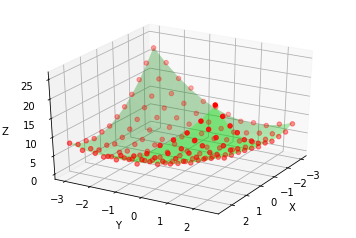

In [12]:
### plot
fig = plt.figure()
## comment: without Axes3D, ax does not work
ax = fig.gca(projection='3d')

# fit surface
ax.plot_surface(X, Y, Z, color='#00FF00', rstride=1, cstride=1, alpha=0.3)

# original data
ax.scatter(Xdat, Ydat, Zdat, color='#FF0000')

# labels
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')

#
ax.axis('equal')
ax.axis('tight')

# change the view point
ax.view_init(30,30)

plt.show()
plt.close()

In [17]:
##### print parameters
print('a = {0:.3f} \n'.format(C[0]))
print('b = {0:.3f} \n'.format(C[1]))
print('c = {0:.3f} \n'.format(C[2]))
print('d = {0:.3f} \n'.format(C[3]))
print('e = {0:.3f} \n'.format(C[4]))
print('f = {0:.3f} \n'.format(C[5]))

a = 0.989 

b = 0.993 

c = 1.015 

d = 1.000 

e = 1.033 

f = 1.096 

